Датасет с эмоциями домашних животных: https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset

Датасет с эмоциями кошек: https://universe.roboflow.com/cats-xofvm/cat-emotions/dataset/1

Датасет с эмоциями собак: https://www.kaggle.com/datasets/danielshanbalico/dog-emotion

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Pet's emotions**

In [3]:
dataset_dir = '/content/drive/MyDrive/datasets/Pets emotions'

In [4]:
classes = os.listdir(dataset_dir)
classes

['Master Folder', 'happy', 'Angry', 'Other', 'Sad']

In [5]:
classes.remove('Master Folder')

In [ ]:
classes

['happy', 'Angry', 'Other', 'Sad']

In [6]:
class_no = {}
img_size = {}
chans = {'R': [], 'G': [], 'B': []}

for nclass in classes:
    class_path = os.path.join(dataset_dir, nclass)
    if os.path.isdir(class_path):

        img_no = len(os.listdir(class_path))
        class_no[nclass] = img_no

        img_size[nclass] = []
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    img_size[nclass].append((img_name, (w, h)))

                    img_array = np.array(img)
                    if img_array.ndim == 3 and img_array.shape[2] == 3:
                        chans['R'].extend(img_array[:, :, 0].flatten())
                        chans['G'].extend(img_array[:, :, 1].flatten())
                        chans['B'].extend(img_array[:, :, 2].flatten())

            except Exception as e:
                print(f"Ошибка при открытии изображения {img_path}: {e}")

In [ ]:
print(f"Всего классов: {len(class_no)}", '\n')

print("Число изображений в каждом классе:")
for nclass, count in class_no.items():
    print(f"{nclass}: {count}")

Всего классов: 4 

Число изображений в каждом классе:
happy: 250
Angry: 250
Other: 250
Sad: 250


In [7]:
for nclass, sizes in img_size.items():
    name, siz = zip(*sizes)
    h = []
    w = []
    for elem in siz:
      h.append(elem[0])
      w.append(elem[1])

In [10]:
no_sqr = 0
for i in range(len(h)):
  if h[i] != w[i]:
    no_sqr += 1

print('Не квадратных изображений:', no_sqr)

Не квадратных изображений: 0


In [11]:
s = np.array(h)

In [12]:
print("Средний размер:", s.mean(), '\n',
      "Минимальный размер:", s.min(), '\n',
      "Максимальный размер:", s.max(), '\n')

Средний размер: 207.26 
 Минимальный размер: 179 
 Максимальный размер: 224 



Канал R: Среднее = 127.31, Стандартное отклонение = 71.30, Минимум = 0, Максимум = 255
Канал G: Среднее = 116.14, Стандартное отклонение = 68.55, Минимум = 0, Максимум = 255
Канал B: Среднее = 103.72, Стандартное отклонение = 69.41, Минимум = 0, Максимум = 255


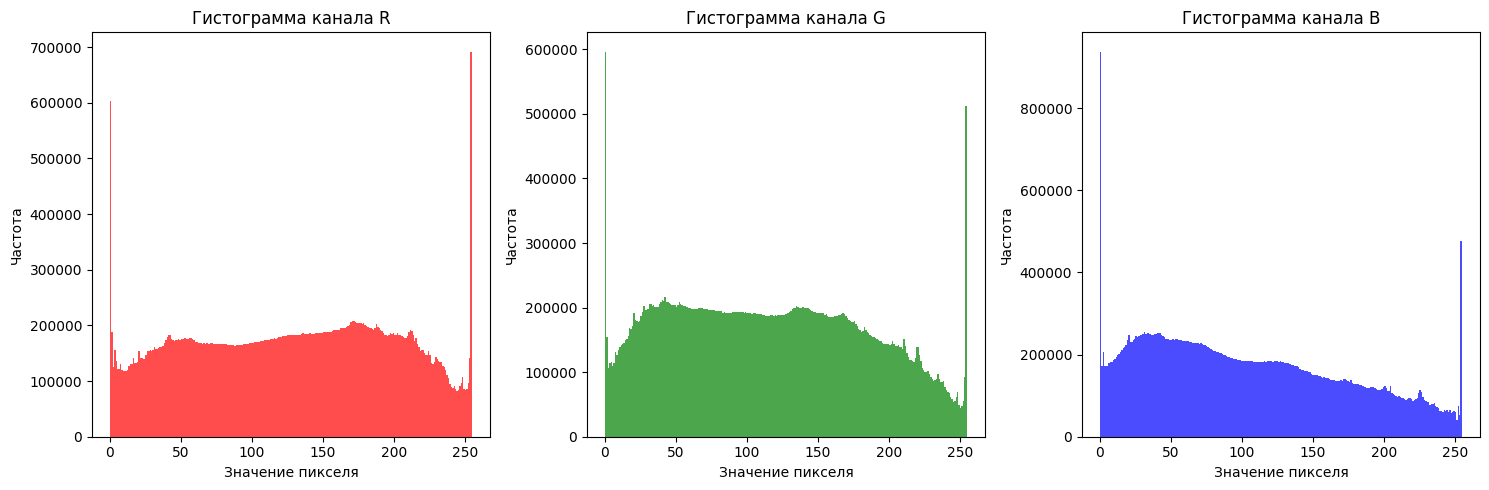

In [ ]:
for chan in chans:
    chans[chan] = np.array(chans[chan])

for chan in ['R', 'G', 'B']:
    mean = np.mean(chans[chan])
    std_dev = np.std(chans[chan])
    min_val = np.min(chans[chan])
    max_val = np.max(chans[chan])
    print(f'Канал {chan}: Среднее = {mean:.2f}, Стандартное отклонение = {std_dev:.2f}, Минимум = {min_val}, Максимум = {max_val}')

plt.figure(figsize=(15, 5))

for i, chan in enumerate(['R', 'G', 'B']):
    plt.subplot(1, 3, i + 1)
    plt.hist(chans[chan], bins=256, color=chan.lower(), alpha=0.7)
    plt.title(f'Гистограмма канала {chan}')
    plt.xlabel('Значение пикселя')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [ ]:
def random_from_class(path, classes):
    rimages = []
    class_names = []

    for nclass in classes:
        class_folder = os.path.join(path, nclass)
        if os.path.isdir(class_folder):
            images = [img for img in os.listdir(class_folder) if img.endswith(('png', 'jpg', 'jpeg'))]
            if images:
                random_image = random.choice(images)
                rimages.append(os.path.join(class_folder, random_image))
                class_names.append(nclass)


    n_cols = len(rimages)
    plt.figure(figsize=(15, 5))

    for i, image_path in enumerate(rimages):
        img = Image.open(image_path)
        plt.subplot(1, n_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_names[i])

    plt.tight_layout()
    plt.show()

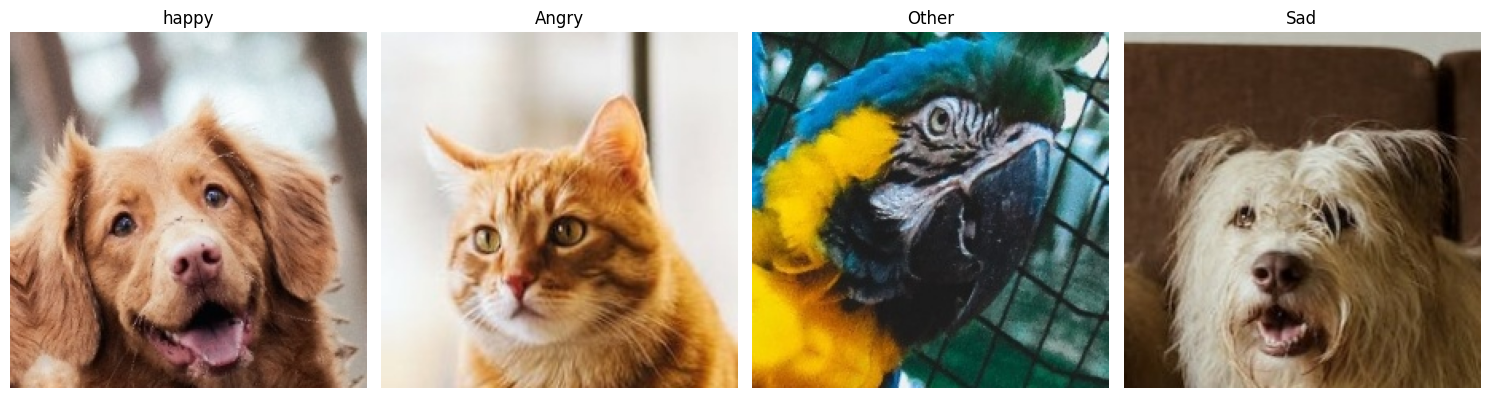

In [ ]:
random_from_class(dataset_dir, classes)



---



# **ВЫВОДЫ:**

В датасете всего 1000 изображений, 4 класса, по классам изображения распределены равномерно

Самих классов эмоций мало: angry, happy, sad и other. В датасете изображения разных животных (кошки, собаки, морские свинки и др), по животным не классифицирован

Размеры изображений либо 224х224 (большинство), либо 179х179

По анализу каналов RGB есть вылеты на 0 и 255 - возможно, из-за присутстия ч/б изображений в датасете или есть изображения с проблемами с экспозицией

Есть разбиение на test/train/valid



---



# **2. Cat's emotions**

In [18]:
dataset_dir = '/content/drive/MyDrive/datasets/Cat Emotions.v1-test.folder'

In [19]:
classes = os.listdir(dataset_dir)

In [20]:
classes

['README.dataset.txt',
 'README.roboflow.txt',
 'Master folder',
 'Happy',
 'Angry',
 'Scared',
 'Normal',
 'Sad',
 'Disgusted',
 'Surprised']

In [21]:
classes.remove('Master folder')
classes.remove('README.roboflow.txt'),
classes.remove('README.dataset.txt')

In [22]:
classes

['Happy', 'Angry', 'Scared', 'Normal', 'Sad', 'Disgusted', 'Surprised']

In [23]:
class_no = {}
img_size = {}
chans = {'R': [], 'G': [], 'B': []}

In [24]:
for nclass in classes:
    class_path = os.path.join(dataset_dir, nclass)
    if os.path.isdir(class_path):

        img_no = len(os.listdir(class_path))
        class_no[nclass] = img_no

In [25]:
for nclass in classes:
    class_path = os.path.join(dataset_dir, nclass)
    if os.path.isdir(class_path):

        img_size[nclass] = []
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    img_size[nclass].append((img_name, (w, h)))

            except Exception as e:
                print(f"Ошибка при открытии изображения {img_path}: {e}")

In [26]:
for nclass in classes:
    class_path = os.path.join(dataset_dir, nclass)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    with Image.open(img_path) as img:
                        img_array = np.array(img)

                        if img_array.ndim == 3 and img_array.shape[2] == 3:
                            chans['R'].append(img_array[:, :, 0].flatten())
                            chans['G'].append(img_array[:, :, 1].flatten())
                            chans['B'].append(img_array[:, :, 2].flatten())
                except Exception as e:
                    print(f"Ошибка при открытии изображения {img_path}: {e}")

for elem in chans:
    chans[elem] = np.concatenate(chans[elem])

In [27]:
print(f"Всего классов: {len(class_no)}", '\n')

print("Число изображений в каждом классе:")
for nclass, count in class_no.items():
    print(f"{nclass}: {count}")

Всего классов: 7 

Число изображений в каждом классе:
Happy: 98
Angry: 99
Scared: 99
Normal: 98
Sad: 98
Disgusted: 79
Surprised: 100


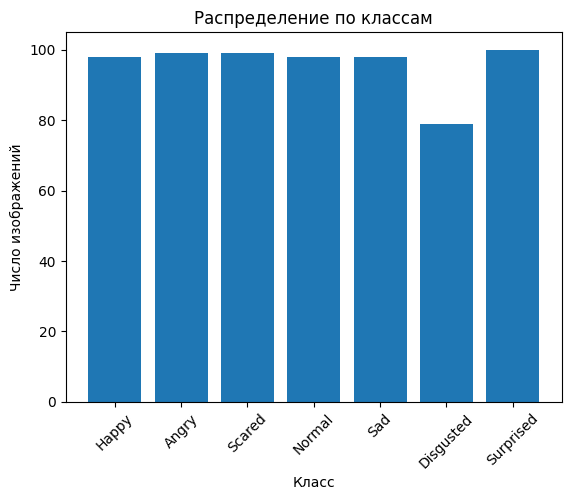

In [ ]:
x = list(class_no.keys())
y = list(class_no.values())
plt.bar(x, y)
plt.title('Распределение по классам')
plt.xlabel('Класс')
plt.xticks(rotation=45)
plt.ylabel('Число изображений')

plt.show()

In [28]:
for nclass, sizes in img_size.items():
    name, siz = zip(*sizes)
    h = []
    w = []
    for elem in siz:
      h.append(elem[0])
      w.append(elem[1])

In [ ]:
no_sqr = 0
for i in range(len(h)):
  if h[i] != w[i]:
    no_sqr += 1

print('Не квадратных изображений:', no_sqr)

Не квадратных изображений: 0


In [29]:
s = np.array(h)

In [30]:
print("Средний размер:", s.mean(), '\n',
      "Минимальный размер:", s.min(), '\n',
      "Максимальный размер:", s.max(), '\n')

Средний размер: 640.0 
 Минимальный размер: 640 
 Максимальный размер: 640 



Канал R: Среднее = 138.20, Стандартное отклонение = 68.86, Минимум = 0, Максимум = 255
Канал G: Среднее = 126.83, Стандартное отклонение = 68.52, Минимум = 0, Максимум = 255
Канал B: Среднее = 112.98, Стандартное отклонение = 71.93, Минимум = 0, Максимум = 255


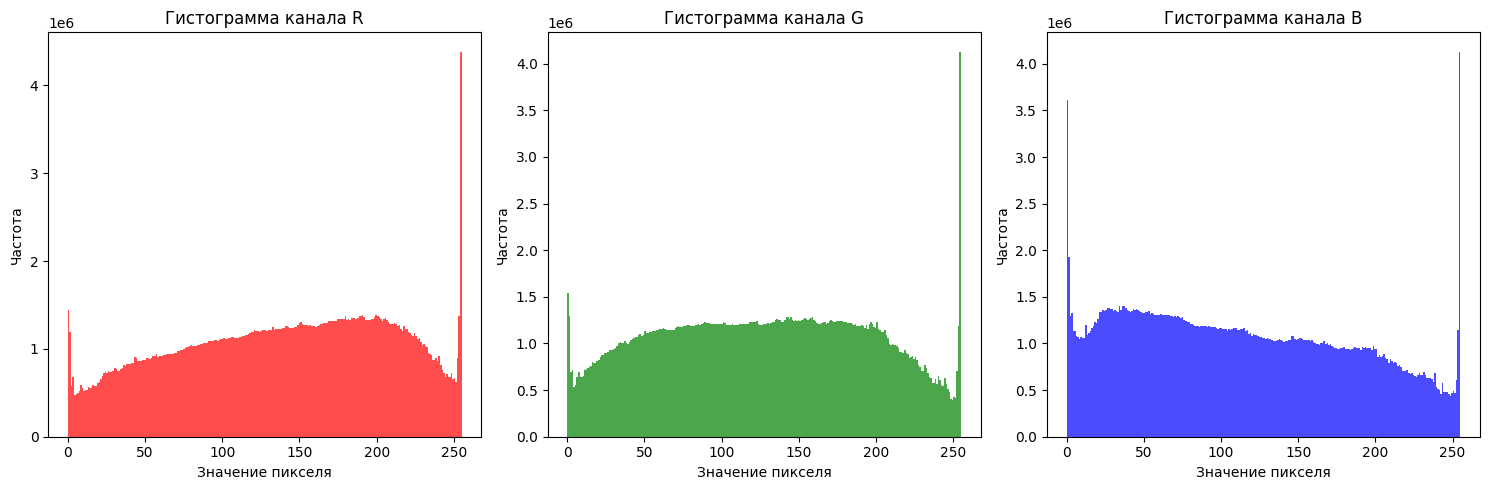

In [ ]:
for elem in ['R', 'G', 'B']:
    mean = np.mean(chans[elem])
    std_dev = np.std(chans[elem])
    min_val = np.min(chans[elem])
    max_val = np.max(chans[elem])
    print(f'Канал {elem}: Среднее = {mean:.2f}, Стандартное отклонение = {std_dev:.2f}, Минимум = {min_val}, Максимум = {max_val}')

plt.figure(figsize=(15, 5))

for i, elem in enumerate(['R', 'G', 'B']):
    plt.subplot(1, 3, i + 1)
    plt.hist(chans[elem], bins=256, color=elem.lower(), alpha=0.7)
    plt.title(f'Гистограмма канала {elem}')
    plt.xlabel('Значение пикселя')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()


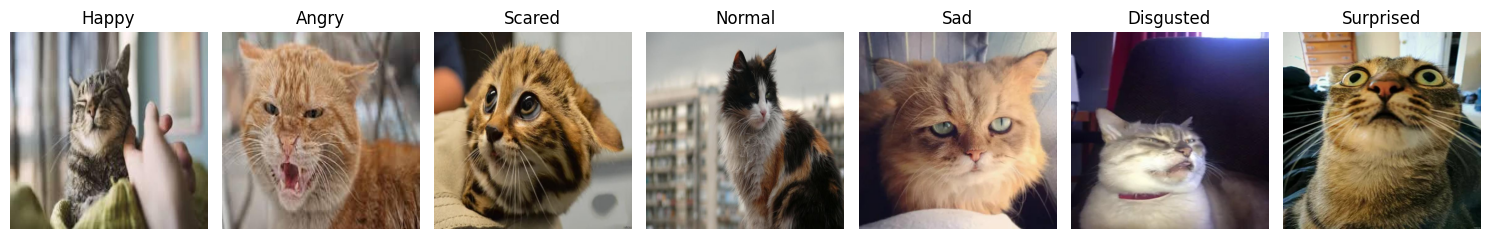

In [ ]:
random_from_class(dataset_dir, classes)



---



# **ВЫВОДЫ:**

В датасете всего 671 изображение, 7 классов, по классам изображения распределены более-менее равномерно. Самый маленький класс - Disgusted, 79 изображений, самый большой - Surprised, 100 изображений

Размеры изображений одинаковый: 640х640. Для гугл колаба много весят

По анализу каналов RGB есть вылеты на 0 и 255 - возможно, из-за присутстия изображений на белом/чёрном фоне. Есть изображения, будто сгенерированные нейросетью, а не фотки

Есть разбиение на train/valid



---



# **3. Dog's emotions**

In [31]:
dataset_dir = '/content/drive/MyDrive/datasets/Dog Emotion'

In [32]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Dog Emotion/labels.csv')

In [ ]:
data.value_counts('label')

,count
label,
angry,1000
happy,1000
relaxed,1000
sad,1000


In [47]:
classes = ['angry', 'happy', 'relaxed', 'sad']

In [48]:
img_size = {}
chans = {'R': [], 'G': [], 'B': []}

In [49]:
for nclass in classes:
    class_path = os.path.join(dataset_dir, nclass)
    if os.path.isdir(class_path):

        img_size[nclass] = []
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    img_size[nclass].append((img_name, (w, h)))

            except Exception as e:
                print(f"Ошибка при открытии изображения {img_path}: {e}")

In [ ]:
for nclass in classes:
    class_path = os.path.join(dataset_dir, nclass)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    with Image.open(img_path) as img:
                        img_array = np.array(img)

                        if img_array.ndim == 3 and img_array.shape[2] == 3:
                            chans['R'].append(img_array[:, :, 0].flatten())
                            chans['G'].append(img_array[:, :, 1].flatten())
                            chans['B'].append(img_array[:, :, 2].flatten())
                except Exception as e:
                    print(f"Ошибка при открытии изображения {img_path}: {e}")

for elem in chans:
    chans[elem] = np.concatenate(chans[elem])

In [50]:
h = []
w = []
for nclass, sizes in img_size.items():
    name, siz = zip(*sizes)
    for elem in siz:
      h.append(elem[0])
      w.append(elem[1])

In [51]:
no_sqr = 0
for i in range(len(h)):
  if h[i] != w[i]:
    no_sqr += 1

print('Не квадратных изображений:', no_sqr)

Не квадратных изображений: 2256


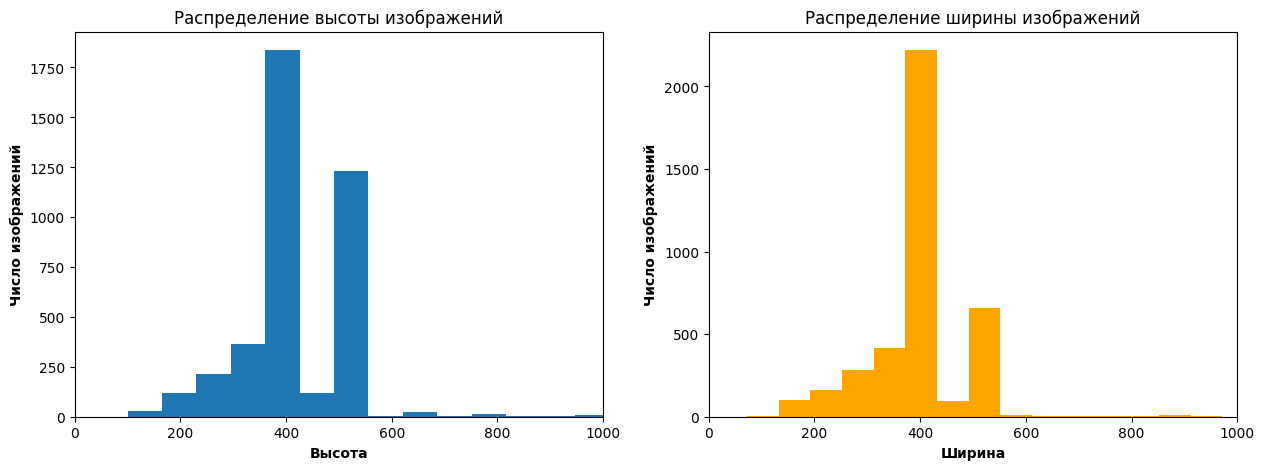

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].hist(h, bins=50)
axs[0].set_title('Распределение высоты изображений')
axs[0].set_xlabel('Высота', fontsize=10, weight='bold')
axs[0].set_ylabel('Число изображений', fontsize=10, weight='bold')
axs[0].set_xlim(0, 1000)

axs[1].hist(w, bins=50, color='orange')
axs[1].set_title('Распределение ширины изображений')
axs[1].set_xlabel('Ширина', fontsize=10, weight='bold')
axs[1].set_ylabel('Число изображений', fontsize=10, weight='bold')
axs[1].set_xlim(0, 1000)

plt.show()

In [73]:
h = np.array(h)
w = np.array(w)

In [74]:
print("Средняя высота:", h.mean(), '\n',
      "Минимальная высота:", h.min(), '\n',
      "Максимальная высота:", h.max(), '\n')
print("Средняя ширина:", w.mean(), '\n',
      "Минимальная ширина:", w.min(), '\n',
      "Максимальная ширина:", w.max(), '\n')

Средняя высота: 417.8225 
 Минимальная высота: 100 
 Максимальная высота: 3355 

Средняя ширина: 388.9135 
 Минимальная ширина: 72 
 Максимальная ширина: 3072 



Канал R: Среднее = 121.06, Стандартное отклонение = 69.43, Минимум = 0, Максимум = 255
Канал G: Среднее = 113.01, Стандартное отклонение = 67.55, Минимум = 0, Максимум = 255
Канал B: Среднее = 98.97, Стандартное отклонение = 67.90, Минимум = 0, Максимум = 255


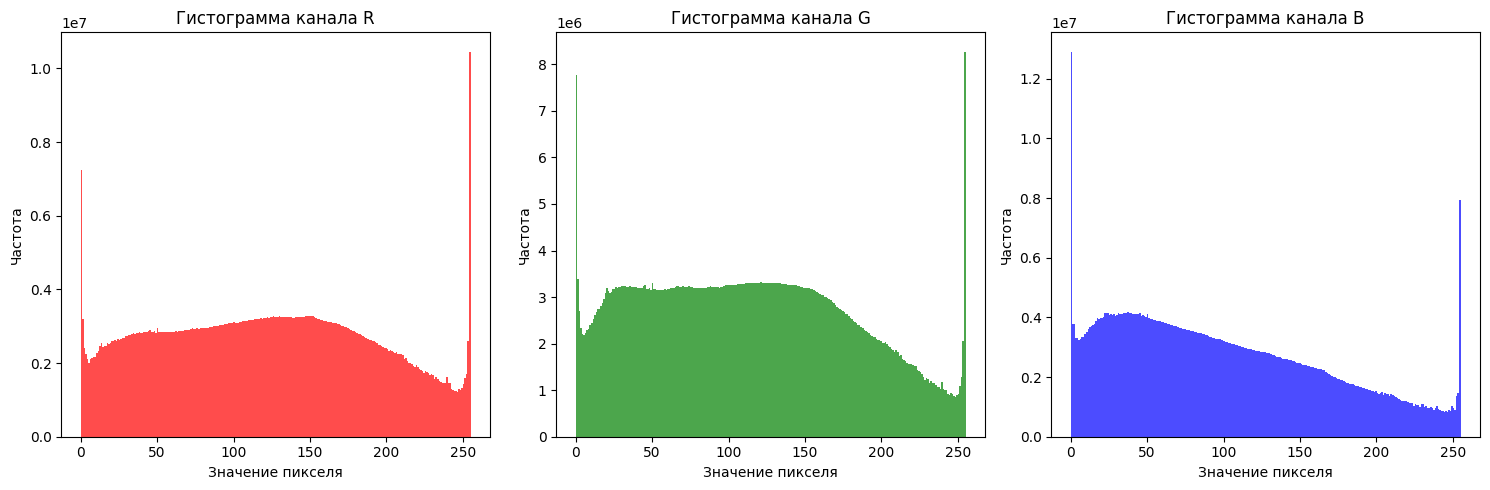

In [ ]:
for elem in ['R', 'G', 'B']:
    mean = np.mean(chans[elem])
    std_dev = np.std(chans[elem])
    min_val = np.min(chans[elem])
    max_val = np.max(chans[elem])
    print(f'Канал {elem}: Среднее = {mean:.2f}, Стандартное отклонение = {std_dev:.2f}, Минимум = {min_val}, Максимум = {max_val}')

plt.figure(figsize=(15, 5))

for i, elem in enumerate(['R', 'G', 'B']):
    plt.subplot(1, 3, i + 1)
    plt.hist(chans[elem], bins=256, color=elem.lower(), alpha=0.7)
    plt.title(f'Гистограмма канала {elem}')
    plt.xlabel('Значение пикселя')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()


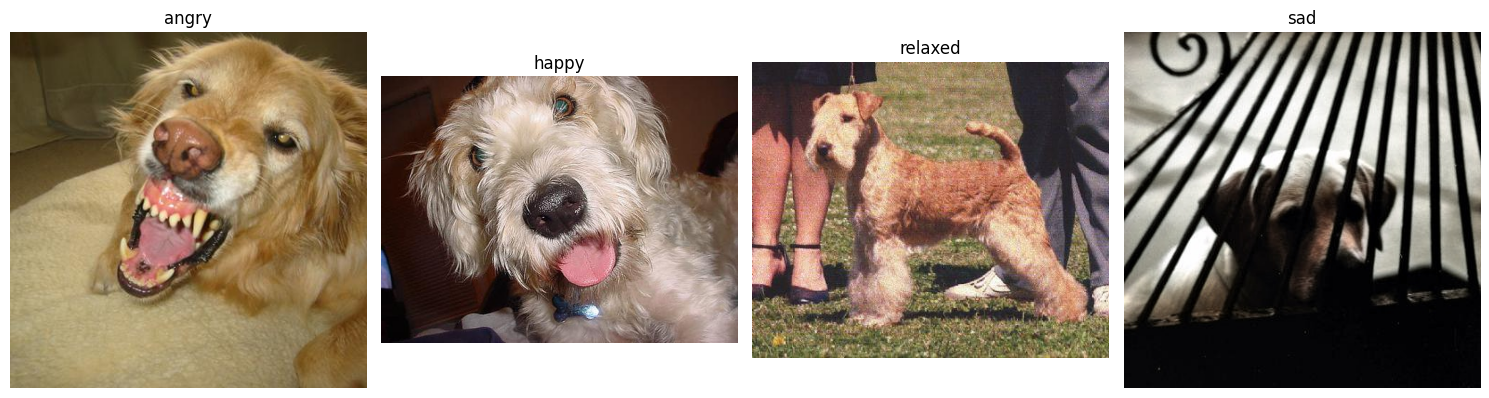

In [ ]:
random_from_class(dataset_dir, classes)



---



# **ВЫВОДЫ:**

В датасете всего 4000 изображений, 4 класса, по классам изображения распределены равномерно


Размеры изображений очень разные, не все квадратные


Есть повороты изображений


По анализу каналов RGB тоже есть вылеты на 0 и 255 - возможно, из-за присутстия изображений на белом/чёрном фоне



---

